In [2]:
# Importing data here
import pandas

# Note: to read this file you have to extract the zip first
big_data = pandas.read_csv('data/usa-real-estate-dataset.zip')
small_data = pandas.read_csv('data/realtor-real-estate-usa.csv')

#print(small_data)
#print(big_data)

In [ ]:
# Data merging here
# Concatenate the datasets
merged_data = pandas.concat([big_data, small_data], ignore_index=True)

# Save the merged data to a CSV file
merged_data.to_csv('data/merged_real_estate_data.csv', index=False)

print(merged_data)


In [ ]:
# Data clean up here, done by Evan Rybovic
importantCols = ['price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'house_size']
print(f'Size before cleaning: {merged_data.shape}')

# Droping rows that have empty values in any of the important columns defined above
merged_data = big_data.dropna(subset=importantCols)
print(f'Size after cleaning: {merged_data.shape}')

print(merged_data)

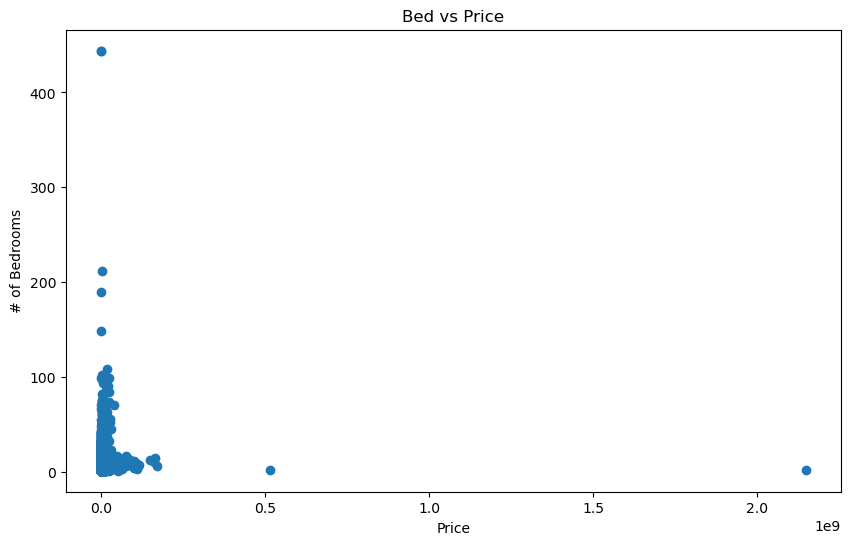

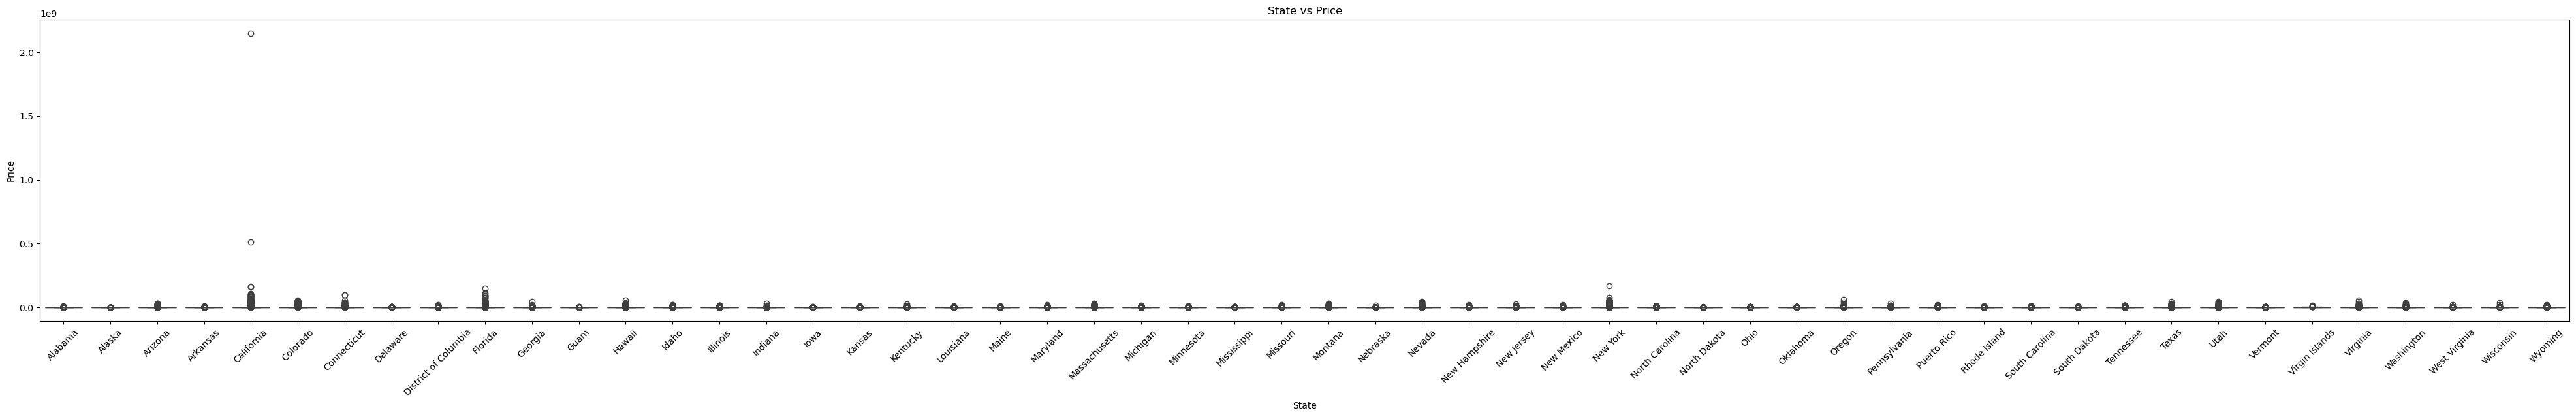

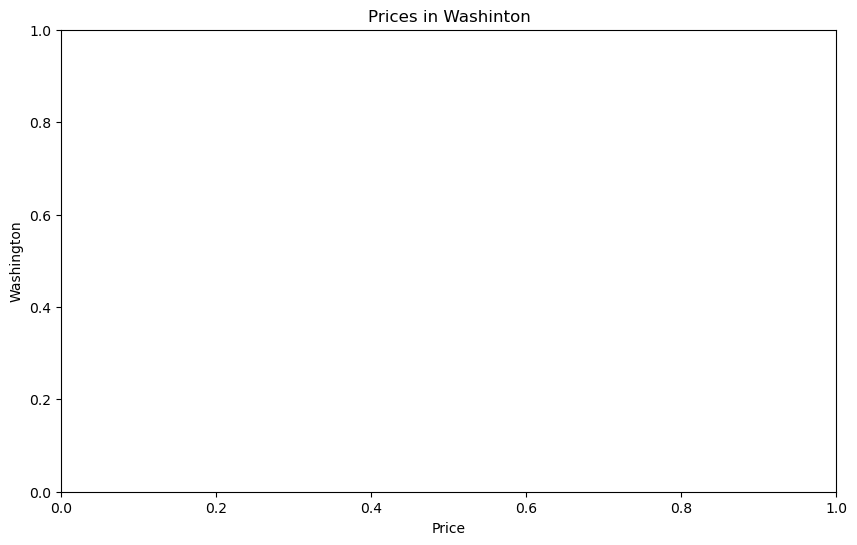

In [17]:
# Data Vizualization here by Evan Rybovic
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot, $ of Bed vs Price
plt.figure(figsize=(10,6))
plt.scatter(merged_data['price'], merged_data['bed'])
plt.title('Bed vs Price')
plt.xlabel('Price')
plt.ylabel('# of Bedrooms')
plt.show()

# Bar plot Location vs Price
ordered_states = sorted(merged_data['state'].unique())
plt.figure(figsize=(50,6))
sns.boxplot(x='state',y='price', data=merged_data, order=ordered_states)
plt.title('State vs Price')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

cali_prices = merged_data[merged_data['state'] == 'Delaware']
plt.figure(figsize=(10,6))
sns.boxplot(x='price', data=cali_prices)
plt.title('Prices in Delaware')
plt.xlabel('Price')
plt.ylabel('Delaware')
plt.show()


In [ ]:
# Clustering

In [ ]:
# Regression